Neutrino Mass Matrices

In [56]:
import numpy as np
import sympy as sy
import math
from numpy.random import default_rng
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

Definimos las matrices de Gell-Mann

In [57]:
l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

lam = np.array([l0,l1,l2,l3,l4,l5,l6,l7,l8])
# print('l1=', l1, 'l2=', l2, 'l3=', l3 , 'l4=',l4 ,'l5=',l5 , 'l6=', l6, 'l7=',l7 , 'l8',l8)

Definimos un producto punto entre matrices

In [58]:
Ra = default_rng(42).random((3,3))

def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr = np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

In [59]:
(matrixdot(lam[4], lam[4])) 

(1+0j)

In [60]:
(matrixcoeff(lam[8]))


array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       1.+0.j])

In [61]:

np.einsum('i,ijk',matrixcoeff(Ra),lam)


array([[0.77395605+0.j, 0.43887844+0.j, 0.85859792+0.j],
       [0.69736803+0.j, 0.09417735+0.j, 0.97562235+0.j],
       [0.7611397 +0.j, 0.78606431+0.j, 0.12811363+0.j]])

In [62]:
Ra - np.einsum('i,ijk',matrixcoeff(Ra),lam)

array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -2.77555756e-17+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.11022302e-16+0.j]])

Definimos las matrices diagonales para las masas de los quarks; up, down y ()

In [63]:
m_u = 2.16e+6
m_c = 1.27e+9
m_t = 172.69e+9
m_b = 4.18e+9
m_d = 4.67e+6
m_s = 93e+6
m_e = 0.51099e+6
m_mu = 105.6583e+6
m_tau = 1776.86e+6

Mu = (1/m_t)*np.diagflat([m_u,m_c,m_t], 0)
print(Mu)
Md = (1/m_b)*np.diagflat([m_d,m_s,m_b],0)
print(Md)
Ml = (1/m_tau)*np.diagflat([m_e,m_mu,m_tau],0)
print(Ml)

[[1.25079622e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.35421854e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[0.00111722 0.         0.        ]
 [0.         0.0222488  0.        ]
 [0.         0.         1.        ]]
[[2.87580338e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.94634918e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [64]:
matrixcoeff(Mu)

array([ 0.41125574+0.j,  0.        +0.j,  0.        +0.j, -0.00367086+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57522368+0.j])

In [65]:
matrixcoeff(Md)

array([ 0.41778743+0.j,  0.        +0.j,  0.        +0.j, -0.01056579+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57060508+0.j])

In [66]:
matrixcoeff(Ml)

array([ 0.43264156+0.j,  0.        +0.j,  0.        +0.j, -0.02958796+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.56010162+0.j])

Calculamos $C_0$ para $M$

In [67]:
C01 = np.sqrt(3/2)*matrixdot(l0, Mu)
print('C_01=',C01)

C_01= 0.5036833632520701


In [68]:
C02 = np.sqrt(3/2)*matrixdot(l0, Md)
print('C_02=',C02)

C_02= 0.5116830143540669


In [69]:
C03 = np.sqrt(3/2)*matrixdot(l0, Ml)
print('C_03=',C03)

C_03= 0.5298755360579899


Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.

Para +$\Delta$

In [70]:
C0Mu = 1/m_t
C0Mc = 1/m_t
C0Mt = -(m_u+m_c)/m_t**2
dm_u = 0.49e+6
dm_c = 0.02e+9
dm_t = 0.4e+9

DC01 = C0Mu*dm_u + C0Mc*dm_c + C0Mt*dm_t
print(DC01)

0.00010158844981379264


In [71]:
C0Md = 1/m_b
C0Ms = 1/m_b
C0Mb = -(m_d+m_s)/m_b**2
dm_d = 0.48e+6
dm_b = 0.03e+9
dm_s = 11e+6
DC02 = C0Md*dm_d + C0Ms*dm_s + C0Mb*dm_b
print(DC02)

0.002578712712621048


In [72]:
C0Me = 1/m_tau
C0Mmu = 1/m_tau
C0Mtau = (m_e+m_mu)/m_tau**2
dm_e = 0.0000000031e+6
dm_mu = 0.0000024e+6
dm_tau = 0.12e+6
DC03 = C0Me*dm_e + C0Mmu*dm_mu + C0Mtau*dm_tau
print(DC03)

4.036633023376959e-06


$\Delta C_{0u}= 0.00010158844981379264$

$\Delta C_{0d}= 0.002578712712621048$

$\Delta C_{0l}=4.036633023376959e-06$

Ahora construimos la gráfica de errores para cada matriz.

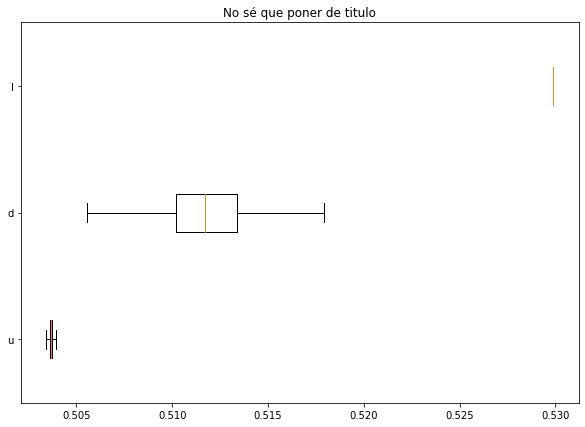

In [146]:
data1 = np.random.normal(C01, DC01, 500)
data2 = np.random.normal(C02, DC02, 500)
data3 = np.random.normal(C03, DC03, 500)
data = [data1,data2,data3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.boxplot(data, labels=['u', 'd', 'l'], vert=0, showfliers=False)
plt.title("No sé que poner de titulo")
plt.show()

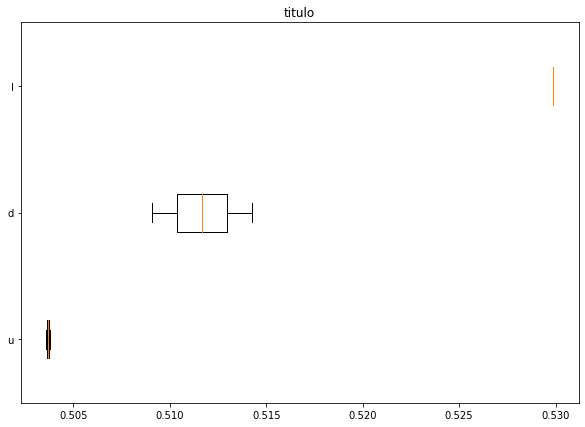

In [127]:
data4 = [C01-DC01, C01, C01+DC01]
data5 = [C02-DC02, C02, C02+DC02]
data6 = [C03-DC03, C03, C03+DC03]
dataprime=[data4, data5, data6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.boxplot(dataprime, labels=['u', 'd', 'l'], vert=0)
plt.title("titulo")
plt.show()

In [74]:
((m_e+m_mu)/m_tau+1), C03 , 2*C03

(1.05975107211598, 0.5298755360579899, 1.0597510721159797)

In [75]:
C03 = (np.sqrt(3/2))*matrixdot(l0, Ml)
print('C_03=',C03)

C33 = matrixdot(l3, Ml)
print('C_33=', C33)

C83 = matrixdot(l8, Ml)
print('C_83',C83)

m3 = 0.05
m1 = m3*C33+m3*np.sqrt(3)*C83+m3
print('m_1=',m1)

m10 = (m3/2)*(2*(C33+C03)-1)

m2 = m3*np.sqrt(3)*C83-m3*C33+m3
print('m_2=',m2)

m20 = m3*C03-m3/2-m3*C33
print('m_3=',m3)

C_03= 0.5298755360579899
C_33= -0.029587955719640267
C_83 -0.560101620404361
m_1= 1.4379016917476228e-05
m_2= 0.002973174588881508
m_3= 0.05


$\Delta C_{3l}=-0.029587955719640267
\\ 
\Delta C_{8l}=-0.560101620404361$

$m_1=\frac{m_3}{2}\times(\sqrt(3)*2*C_{83}+2*C_{03}+2)$

$m_2=m_3\sqrt(3)C_{83}-m_3C_{33}+m_3$


In [76]:
(m_e-m_mu)/m_tau , C33 ,2*C33

(-0.059175911439280526, -0.029587955719640267, -0.05917591143928053)

In [77]:
1/np.sqrt(3)*((m_e+m_mu)/m_tau -2),C83, 2*C83

(-1.120203240808722, -0.560101620404361, -1.120203240808722)

In [78]:
D2m_21 = m2**2-m1**2

D2m_32 = m3**2-m2**2

$\Delta (m_{21})^2= 8.83956037984321e-06$

$\Delta (m_{32})^2=0.00249116023286403$

Ahora queremos representar gráficamente la relación entre estas diferencias de masa y la masa fija.

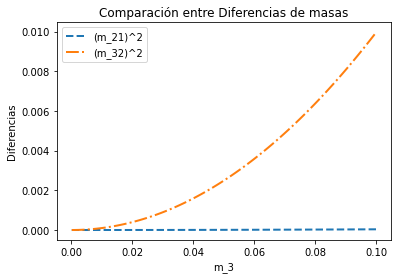

In [79]:
x = np.linspace(1e-4,1e-1,100)
def m_1(x):
    return ((x*(C33+C03)-x/2))
#m10=(x*(C33+C03)-x/2)

def m_2(x):
    return (x*C03-x/2-x*C33)
#m20=x*C03-x/2-x*C33

y1 = m_2(x)**2-m_1(x)**2
y2 = x**2-m_2(x)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, = ax.plot(x, y2, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')

ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas')

ax.legend()
plt.show()

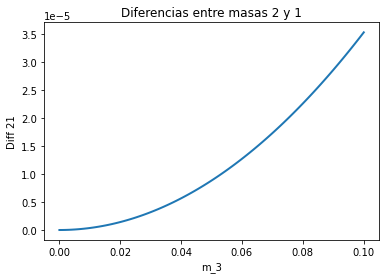

In [80]:
x = np.linspace(1e-4,1e-1,100)

fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')

plt.show()

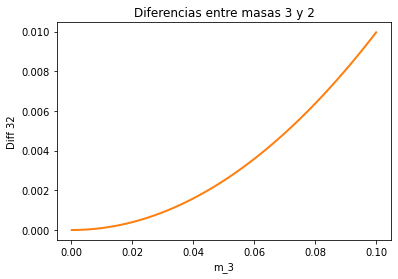

In [81]:
fig, ax = plt.subplots()

ax.plot(x, y2, linewidth=2.0, color='tab:orange')
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 32')
ax.set_title('Diferencias entre masas 3 y 2')

plt.show()

Introduciendo el factor de majorana tal que $\delta_1+\delta_2=\delta, \quad \delta_1-\delta_2=0$

In [82]:
t = np.linspace(1e-4, 1e-1, 100)
def m1m(x,t):
    return (x*(C33+C03)-(x+t)/2)

#def m1m(x,t):
 #   return (x*(np.sqrt(3)*C83+C33)+(2*x-t)/2)

def m2m(x,t):
    return (x*(C03-C33)-(x+t)/2)

#def m2m(x,t):
 #   return (x*(np.sqrt(3)*C83-C33)+(2*x-t)/2)

In [83]:
m1m(0.05, 0)

1.4379016917483167e-05

In [84]:
m2m(0.05,0)

0.0029731745888815046

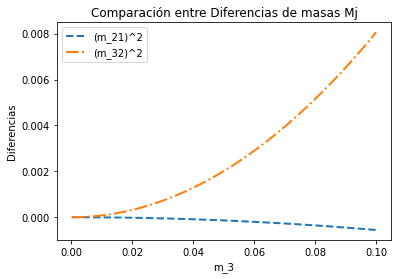

In [85]:
y1m = m2m(x,t)**2-m1m(x,t)**2
y2m = x**2-m2m(x,t)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1m, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, = ax.plot(x, y2m, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')
ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas Mj')

ax.legend()
plt.show()

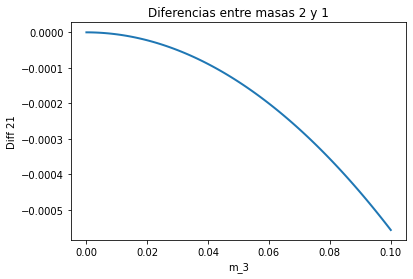

In [86]:
fig, ax = plt.subplots()

ax.plot(x, y1m, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')

plt.show()

/tmp/ipykernel_8815/980215614.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z0 = np.sqrt((m2m(X,Y))**2-(m1m(X,Y))**2)


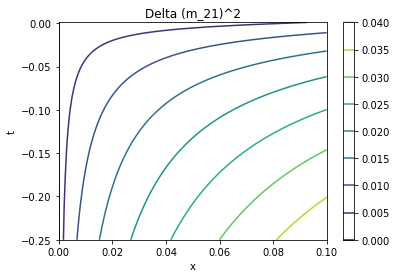

In [145]:
xlist_0 = np.linspace(0, 1e-1, 100)
ylist_0 = np.linspace(-0.25, .001, 100)
X, Y = np.meshgrid(xlist_0, ylist_0)
Z0 = np.sqrt((m2m(X,Y))**2-(m1m(X,Y))**2)

fig,ax = plt.subplots(1,1)
cp0 = ax.contour(X, Y, Z0)

fig.colorbar(cp0)
ax.set_title('Delta (m_21)^2')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

/tmp/ipykernel_8815/3672229279.py:1: RuntimeWarning: invalid value encountered in sqrt
  Z0_0 = np.sqrt(X**2-m2m(X,Y)**2)


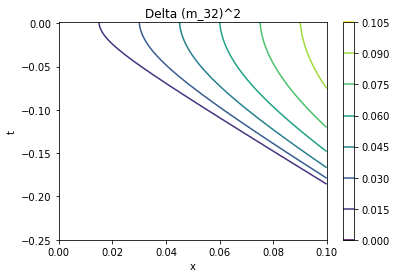

In [144]:
Z0_0 = np.sqrt(X**2-m2m(X,Y)**2)

fig,ax = plt.subplots(1,1)
cp1 = ax.contour(X, Y, Z0_0)

fig.colorbar(cp1)

ax.set_title('Delta (m_32)^2')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

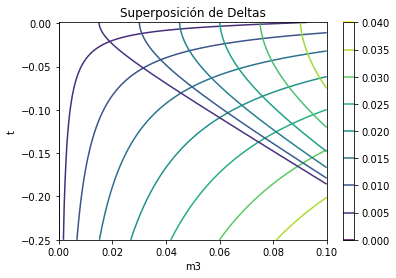

In [143]:
fig,ax = plt.subplots()

cp0 = ax.contour(X, Y, Z0)
cp1 = ax.contour(X, Y, Z0_0)

fig.colorbar(cp0)
ax.set_title('Superposición de Deltas')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.show()

Y para el caso contrario en el que $\delta_1+\delta_2=0, \quad \delta_1-\delta_2=\delta$

In [90]:
t1 = np.linspace(-0.25, 0, 100)
def m1m2(x,t):
    return (x*(C33+C03)-(x+t)/2)

def m2m2(x,t):
    return (x*(C03-C33)-(x-t)/2)

In [91]:
m1m2(0.05,0)

1.4379016917483167e-05

In [92]:
m2m2(0.05,0)

0.0029731745888815046

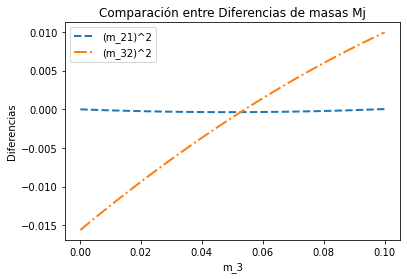

In [93]:
y1m2 = m2m2(x,t1)**2-m1m2(x,t1)**2
y2m2 = x**2-m2m2(x,t1)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1m2, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, = ax.plot(x, y2m2, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')
ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas Mj')

ax.legend()
plt.show()

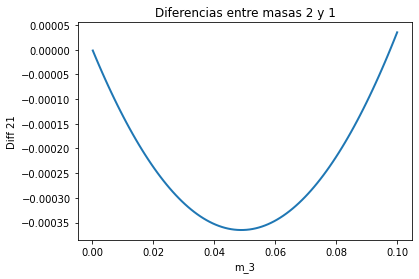

In [94]:
fig, ax = plt.subplots()

ax.plot(x, y1m2, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')

plt.show()

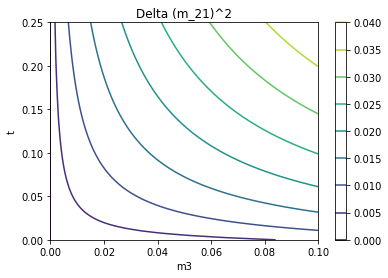

In [142]:
xlist_1 = np.linspace(0, 1e-1, 100)
ylist_1 = np.linspace(0, 0.25, 100)

X_1, Y_1 = np.meshgrid(xlist_1, ylist_1)
Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
fig,ax = plt.subplots()

cp3 = ax.contour(X_1, Y_1, Z1_0)
fig.colorbar(cp3)
ax.set_title('Delta (m_21)^2')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.show()

/tmp/ipykernel_8815/1476450686.py:1: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


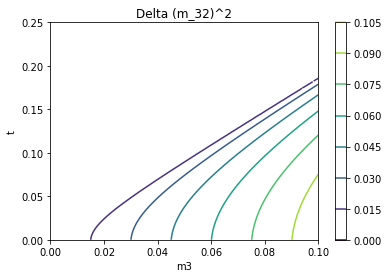

In [141]:
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
fig,ax = plt.subplots()

cp4 = ax.contour(X_1, Y_1, Z1_1)

fig.colorbar(cp4, extend='both')
ax.set_title('Delta (m_32)^2')
ax.set_xlabel('m3')
ax.set_ylabel('t')
plt.show()

/tmp/ipykernel_8815/1557769264.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


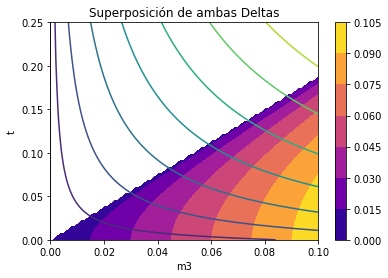

In [140]:
fig,ax = plt.subplots()

Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

mycmap1 = plt.get_cmap('plasma')

cp3 = ax.contour(X_1, Y_1, Z1_0)
cp4 = ax.contourf(X_1, Y_1, Z1_1, cmap=mycmap1)

fig.colorbar(cp4)
ax.set_title('Superposición de ambas Deltas')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.show()

/tmp/ipykernel_8815/805785256.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


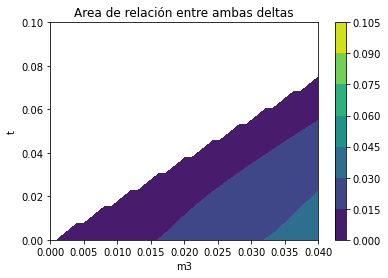

In [139]:
fig,ax = plt.subplots()
                  
Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
Z1_2 = np.abs(Z1_0-Z1_1)

cp4=ax.contourf(X_1, Y_1, Z1_2)

plt.colorbar(cp4)
ax.set_title('Area de relación entre ambas deltas')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.xlim([0,0.04])
plt.ylim([0,0.1])
plt.show()

Repitiendo el proceso pero ahora incluyendo los valores experimentales $\mathrm{Exp} \Delta m^2_{21}$ y $\mathrm{Exp} \Delta m^2_{32}$ y comparando las gráficas con las calculadas anteriormente

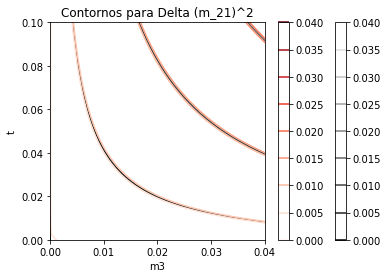

In [138]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, Z2_0+7.53e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, Z2_0-7.53e-5, cmap='Reds')

fig.colorbar(cp5)
fig.colorbar(cp6)
ax.set_title('Contornos para Delta (m_21)^2')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.xlim([0,0.04])
plt.ylim([0,0.1])
plt.show()

/tmp/ipykernel_8815/908746159.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


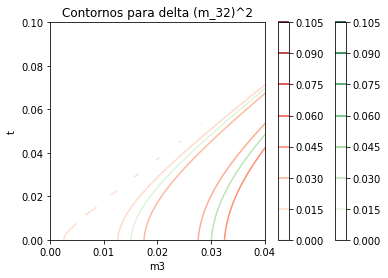

In [137]:
#Para m32 con zoom
fig,ax = plt.subplots()

Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp8 = ax.contour(X_1, Y_1, Z3_0 ,cmap='Greens' )
cp9 = ax.contour(X_1, Y_1, Z3_0+2.453e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, Z3_0-2.453e-3, cmap='Reds')

fig.colorbar(cp8)
fig.colorbar(cp9)
ax.set_title('Contornos para delta (m_32)^2')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.xlim([0,0.04])
plt.ylim([0,0.1])
plt.show()

Se realiza una superposición de ambas diferencias de masa $\Delta m^2_{21}$ y $\Delta m^2_{32}$ con el mismo 'zoom'.

/tmp/ipykernel_8815/1787004237.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


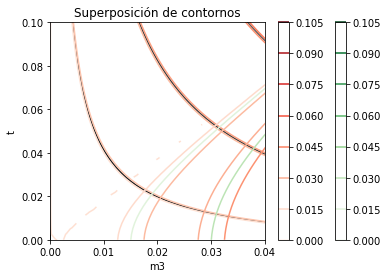

In [135]:
fig,ax=plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, Z2_0+7.53e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, Z2_0-7.53e-5, cmap='Reds')

cp8 = ax.contour(X_1, Y_1, Z3_0, cmap='Greens' )
cp9 = ax.contour(X_1, Y_1, Z3_0+2.453e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, Z3_0-2.453e-3, cmap='Reds')

fig.colorbar(cp8)
fig.colorbar(cp9)
ax.set_title('Superposición de contornos')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.xlim([0,0.04])
plt.ylim([0,0.1])
plt.show()

Se realiza un 'zoom' al primer cuadrante de izquierda a derecha que representa el cruce de los contornos mas bajos.

/tmp/ipykernel_8815/2374558001.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


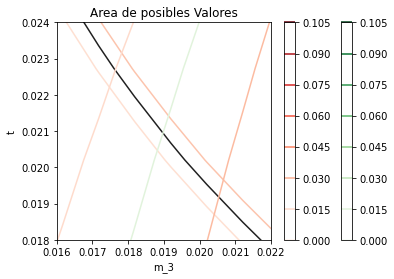

In [134]:
fig,ax = plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, Z2_0+7.53e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, Z2_0-7.53e-5, cmap='Reds')

cp8 = ax.contour(X_1, Y_1, Z3_0, cmap='Greens' )
cp9 = ax.contour(X_1, Y_1, Z3_0+2.453e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, Z3_0-2.453e-3, cmap='Reds')

fig.colorbar(cp8)
fig.colorbar(cp9)
ax.set_title('Area de posibles Valores')
ax.set_xlabel('m_3')
ax.set_ylabel('t')

plt.xlim([0.016,0.022])
plt.ylim([0.018,0.024])
plt.show()

Se extraen los puntos de intersección de cada contorno con otro contorno que no sea paralelo.

/tmp/ipykernel_8815/892504532.py:38: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
/tmp/ipykernel_8815/892504532.py:7: RuntimeWarning: divide by zero encountered in true_divide
  slope = lambda line: (lambda d: d[:,1]/d[:,0])(np.diff(line, axis=0))
/tmp/ipykernel_8815/892504532.py:17: RuntimeWarning: invalid value encountered in true_divide
  yi = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
/tmp/ipykernel_8815/892504532.py:20: RuntimeWarning: invalid value encountered in true_divide
  yi_1 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
/tmp/ipykernel_8815/892504532.py:23: RuntimeWarning: invalid value encountered in true_divide
  yi_2 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
/tmp/ipykernel_8815/892504532.py:26: RuntimeWarning: invalid value encountered in true_divide
  yi_3 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)


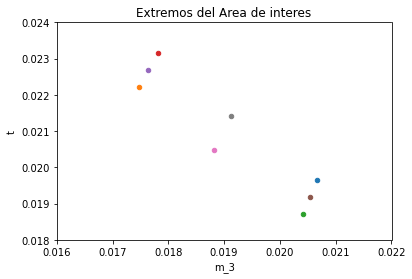

In [133]:
def find_intersections(A, B):
    #this function stolen from https://stackoverflow.com/questions/3252194/numpy-and-line-intersections#answer-9110966
    # min, max and all for arrays
    amin = lambda x1, x2: np.where(x1<x2, x1, x2)
    amax = lambda x1, x2: np.where(x1>x2, x1, x2)
    aall = lambda abools: np.dstack(abools).all(axis=2)
    slope = lambda line: (lambda d: d[:,1]/d[:,0])(np.diff(line, axis=0))

    x11, x21 = np.meshgrid(A[:-1, 0], B[:-1, 0])
    x12, x22 = np.meshgrid(A[1:, 0], B[1:, 0])
    y11, y21 = np.meshgrid(A[:-1, 1], B[:-1, 1])
    y12, y22 = np.meshgrid(A[1:, 1], B[1:, 1])

    m1, m2 = np.meshgrid(slope(A), slope(B))
    m1inv, m2inv = 1/m1, 1/m2

    yi = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi = (yi - y21)*m2inv + x21
    
    yi_1 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_1 = (yi - y21)*m2inv + x21
    
    yi_2 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_2 = (yi - y21)*m2inv + x21
    
    yi_3 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_3 = (yi - y21)*m2inv + x21

    xconds = (amin(x11, x12) < xi, xi <= amax(x11, x12), 
              amin(x21, x22) < xi, xi <= amax(x21, x22) )
    yconds = (amin(y11, y12) < yi, yi <= amax(y11, y12),
              amin(y21, y22) < yi, yi <= amax(y21, y22) )

    return xi[aall(xconds)], yi[aall(yconds)]

X_1,Y_1 = np.meshgrid(xlist_1,ylist_1)
Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
cp5 = ax.contour(X_1, Y_1, Z2_0,cmap='gray')
cp6 = ax.contour(X_1, Y_1, Z2_0+7.53e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, Z2_0-7.53e-5, cmap='Reds')

cp8 = ax.contour(X_1, Y_1, Z3_0, cmap='Greens' )
cp9 = ax.contour(X_1, Y_1, Z3_0+2.453e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, Z3_0-2.453e-3, cmap='Reds')


xi = np.array([])
yi = np.array([])
for linecol in cp7.collections:
    for path in linecol.get_paths():
        for linecol2 in cp10.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi = np.append(xi, xinter)
                yi = np.append(yi, yinter)
                
xi_1 = np.array([])
yi_1 = np.array([])
for linecol in cp6.collections:
    for path in linecol.get_paths():
        for linecol2 in cp9.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_1 = np.append(xi_1, xinter)
                yi_1 = np.append(yi_1, yinter)
                
xi_2 = np.array([])
yi_2 = np.array([])
for linecol in cp6.collections:
    for path in linecol.get_paths():
        for linecol2 in cp10.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_2 = np.append(xi_2, xinter)
                yi_2 = np.append(yi_2, yinter)
                
xi_3 = np.array([])
yi_3 = np.array([])
for linecol in cp7.collections:
    for path in linecol.get_paths():
        for linecol2 in cp9.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_3 = np.append(xi_3, xinter)
                yi_3 = np.append(yi_3, yinter)

                
                
                
                
                
xi_4 = np.array([])
yi_4 = np.array([])
for linecol in cp5.collections:
    for path in linecol.get_paths():
        for linecol2 in cp9.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_4 = np.append(xi_4, xinter)
                yi_4 = np.append(yi_4, yinter)
                
                
xi_5 = np.array([])
yi_5 = np.array([])
for linecol in cp5.collections:
    for path in linecol.get_paths():
        for linecol2 in cp10.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_5 = np.append(xi_5, xinter)
                yi_5 = np.append(yi_5, yinter)
                
                
xi_6 = np.array([])
yi_6 = np.array([])
for linecol in cp6.collections:
    for path in linecol.get_paths():
        for linecol2 in cp8.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_6 = np.append(xi_6, xinter)
                yi_6 = np.append(yi_6, yinter)
                

xi_7 = np.array([])
yi_7 = np.array([])
for linecol in cp7.collections:
    for path in linecol.get_paths():
        for linecol2 in cp8.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_7 = np.append(xi_7, xinter)
                yi_7 = np.append(yi_7, yinter)
                
                
plt.scatter(xi, yi, s=20)
plt.scatter(xi_1, yi_1, s=20)
plt.scatter(xi_2, yi_2, s=20)
plt.scatter(xi_3, yi_3, s=20)
plt.scatter(xi_4, yi_4, s=20)
plt.scatter(xi_5, yi_5, s=20)
plt.scatter(xi_6, yi_6, s=20)
plt.scatter(xi_7, yi_7, s=20)

plt.title('Extremos del Area de interes')
plt.xlabel('m_3')
plt.ylabel('t')
plt.xlim([0.016,0.022])
plt.ylim([0.018,0.024])
plt.show()

Ahora se extraen los valores en $x$ y $y$ de cada punto.

In [104]:
print(xi_7)

[0.01913107 0.03102351 0.04541805 0.06024621 0.07517914 0.03162129
 0.03808041 0.04880028 0.06198857 0.07619284 0.09080834 0.04561129
 0.04976581 0.05703945 0.06721975 0.07947984 0.09295163 0.05996409
 0.063013   0.06832282 0.07600197 0.08588018 0.09750213 0.07446516
 0.07686377 0.0810193  0.08704045 0.09496351 0.08902023 0.09100037
 0.09441245 0.09933552]


In [105]:
print(yi_7)

[0.02142222 0.01208257 0.00684098 0.00364462 0.00135583 0.05187136
 0.04237019 0.03193853 0.02375365 0.01779209 0.01335217 0.080694
 0.07348749 0.06331042 0.05261162 0.04315576 0.03541989 0.10893911
 0.10331543 0.0946863  0.08425568 0.07345868 0.06341095 0.13691591
 0.1323622  0.12509581 0.11575252 0.10519659 0.16478844 0.1609712
 0.15475902 0.14651748]


Se crean los arreglos para graficar cada uno de los puntos. 

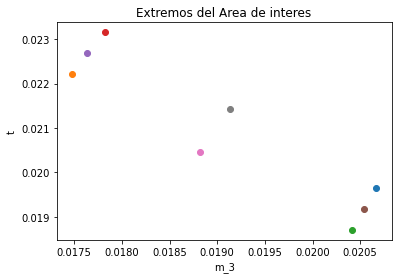

In [132]:
#punto azul
x0, p0 = (0.02066815, 0.01965737)

#punto naranja
x1, p1 = (0.0174766, 0.02221401)

#punto verde
x2, p2 = (0.02041111, 0.01870287)

#punto rojo
x3, p3 = (0.01782115, 0.02315625)

#punto morado
x4, p4 = (0.01763993, 0.02268155)

#punto cafe
x5, p5 = (0.02054, 0.01918151)

#punto rosa
x6, p6 = (0.01881923, 0.02046863)

#punto gris
x7, p7 = (0.01913107, 0.02142222)

plt.title('Extremos del Area de interes')
plt.xlabel('m_3')
plt.ylabel('t')
plt.scatter(x0, p0)
plt.scatter(x1, p1)
plt.scatter(x2, p2)
plt.scatter(x3, p3)
plt.scatter(x4, p4)
plt.scatter(x5, p5)
plt.scatter(x6, p6)
plt.scatter(x7, p7)


Aproximación del area encerrada en la grafica de contorno utilizando los puntos extraidos.

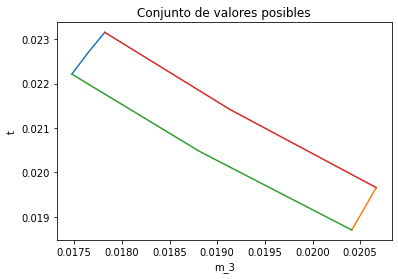

In [131]:
x8= np.array([x1, x4, x3])
p8= np.array([p1, p4, p3])

x9= np.array([x2, x5, x0])
p9= np.array([p2, p5, p0])

x10= np.array([x1, x6, x2])
p10= np.array([p1, p6, p2])

x11= np.array([x3, x7, x0])
p11= np.array([p3, p7, p0])

plt.title('Conjunto de valores posibles')
plt.xlabel('m_3')
plt.ylabel('t')
plt.plot(x8, p8)
plt.plot(x9, p9)
plt.plot(x10, p10)
plt.plot(x11, p11)